#Traveling Salesperson Project

Leon 

Use simulated annealing to and an approximate solution to the Traveling Salesperson Problem
(TSP). Put all your work in a new Colab notebook. Set things up so you can easily vary the number
of points N. See how large you can make N and still and a good tour in reasonable amount of time.

Then implement at least one of the following extensions of the TSP:
1. Suppose north-south travel is more expensive than east-west travel. Modify your distance
function so that the difference between y-values is multiplied by some constant c. You might
think of this new function as a \cost" function rather than a distance function. This is now
the function to minimize along the tour.
2. Suppose that the points lie on either side of a border, and crossing the border involves an
additional cost. For example, you might let the line y = 5 be the border. If an edge crosses
this line, then its \cost" equals its distance plus some constant c. The cost of traveling along
an edge that doesn't cross the border is simply the distance along the edge. The cost function
is now the function to minimize along the tour.

#Goals:
1. use simulated annealing to approximate the solution to the Traveling Salesperson Problem.
2. Impleament one of the extensions

First, import some of the functions

In [0]:
import matplotlib.pyplot as plt
import random
import numpy as np
import math

Generate some of the points. Plot them. 

[[3.92029036e+00 4.79639752e+00]
 [6.53162958e+00 4.70515230e+00]
 [6.69075820e-01 3.61829178e-03]
 [5.77754594e+00 7.68049394e+00]
 [3.41666924e+00 2.20460661e+00]
 [7.50518635e+00 2.14029690e+00]
 [4.93369409e+00 9.42941969e+00]
 [7.41299924e+00 2.41018088e+00]
 [1.12314165e+00 7.43983968e+00]
 [6.72460722e-01 6.97326600e+00]]


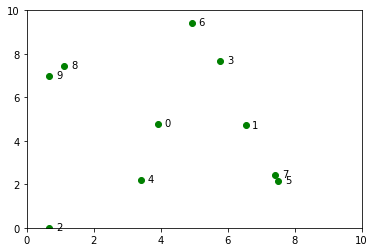

In [0]:
N = 10 # number of points

# generate random points
points = np.random.rand(N, 2) * 10
print(points)

# make the plot
plt.plot(points[:,0], points[:,1], 'go') # plot the points
for i in range(N): # add text labels
    plt.text(points[i,0]+0.2, points[i,1]-0.1, str(i))
plt.xlim(0,10) # set the x-axis limits
plt.ylim(0,10) # set the y-axis limits
plt.show()     # show the plot

Build a tour from 0 to 9. 

In [0]:

trivialTour = list(range(N))
trivialTour

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

Plot the tour 

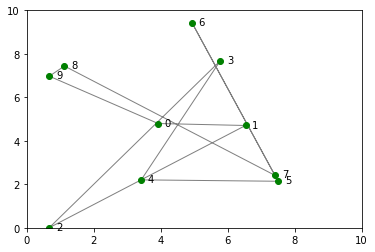

In [0]:
path = plt.Polygon(points, fill=None, edgecolor='0.5') # create the tour
plt.gca().add_patch(path) # add the tour to the plot
plt.plot(points[:,0], points[:,1], 'go') # plot the points
for i in range(N): # add text labels
    plt.text(points[i,0]+0.2, points[i,1]-0.1, str(i))
plt.xlim(0,10) # set the x-axis limits
plt.ylim(0,10) # set the y-axis limits
plt.show()     # show the plot

Then, build a function to calculate the distance between two points. 

In [0]:
# compute the distance between the ith and jth points on a tour
# assume the coordinates of points are stored in a global variable called `points`
def distPair(tour, i, j):
  x1 = points[tour[i],0] #index of ith point on the tour   #tour[j] index of jth point of the tour
  y1=points[tour[i],1]
  x2 = points[tour[j],0]
  y2 = points[tour[j],1]
  dis = math.sqrt((x2-x1)**2 + (y2-y1)**2)
  
  return dis

Test it: 

In [0]:
distPair(trivialTour, 1, 2)

5.043351229692317

Then, build another function to calculate the entire distance of the tour. This distance is not the shortest. 

In [0]:
def distTour(tour):
  dist = 0
  N = len(tour)
  
  for i in range(N-1): # i from 0 to N-2
    # first point is tour[0] to tour[1], last pair is from tour[N-2] to tour[N-1]
    dist += distPair(tour, i, i+1)
    dist += distPair(tour, N-1, 0)
  return dist

Test the function: 

In [0]:
distTour(trivialTour)

115.98581454321743

In [0]:
randomTour = random.sample(range(N), N)
randomTour

[1, 7, 0, 6, 8, 5, 9, 3, 4, 2]

In [0]:
distTour(randomTour)

114.66607868329002

Make a function for plotting the tour: 

In [0]:
def plotTour(tour):
  tourPts = np.zeros((N,2))
  for i in range(N):
    tourPts[i] = points[tour[i]]
    
  plt.figure(figsize=(10,10), dpi=60) # resize the plot
  path = plt.Polygon(tourPts, fill=None, edgecolor='0.5') # create the tour
  plt.gca().add_patch(path) # add the tour to the plot
  plt.plot(points[:,0], points[:,1], 'go') # plot the points
  for i in range(N): # add text labels
    plt.text(points[i,0]+0.2, points[i,1]-0.1, str(i))
  plt.xlim(0,10) # set the x-axis limits
  plt.ylim(0,10) # set the y-axis limits
  plt.show()     # show the plot

#Annealing 

This is the annealing part: 

In [0]:
N = 10 # number of points

# generate random points
points = np.random.rand(N, 2) * 10


trivial tour length: 80.61675196986451


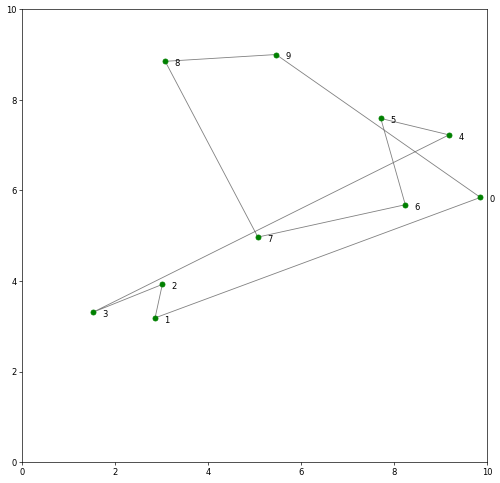

In [0]:
trivialTour = list(range(N))
print("trivial tour length:", distTour(trivialTour))
plotTour(trivialTour)

sig2: 0.00338139191352273 , dist: 50.555515792512715
sig2: 5.468756486982954e-06 , dist: 84.74269561380412
sig2: 2.8184741597483813e-08 , dist: 44.11863083604598
sig2: 6.063871929326224e-13 , dist: 42.23570545170592
sig2: 4.09405419132551e-18 , dist: 44.380838266763504
sig2: 3.21594802448993e-20 , dist: 42.23570545170592
sig2: 1.84158591073848e-22 , dist: 44.380838266763504
original tour: [6 5 3 4 8 1 2 0 7 9]
final tour: [4, 0, 6, 7, 2, 1, 3, 8, 9, 5]
original dist is: 85.78673447625312
Finished. Distance is: 35.20086298946155


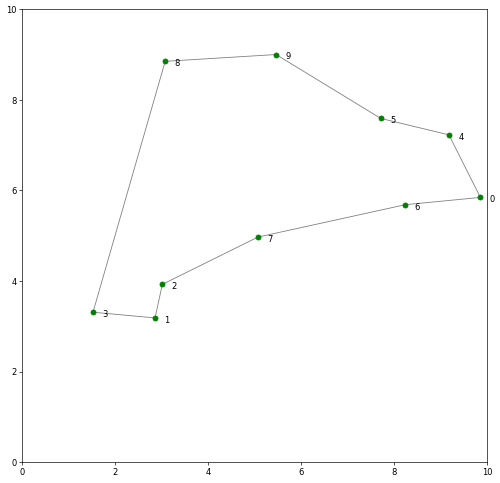

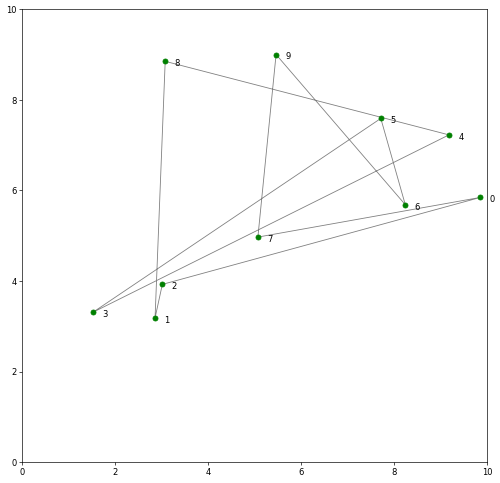

In [0]:
N = 10

currTour = random.sample(range(N), N)#random.sample(range(N), N) # start with a random tour
originalTour = np.copy(currTour) #just make a copy of the original tour for
    #later check
numSteps = 1000 # number of steps
sig2 = 1 # starting value for sigma^2
decFac = 0.9 # decrease factor

dist = distTour(currTour) # this is the only time we need to call distTour()

for s in range(numSteps):
  # choose two indexes i < j, from the set {0, 1, ..., N-1}
  # make sure it is not the case that i = 0 and j = N-1 (if this occurs, you could just use `continue` to try again)
  i = random.randint(0,N-1)
  j = random.randint(0,N-1)
  jnext = j + 1
  ibefore = i - 1
  if i > j or (i==0 and j==N-1):
    continue 
  if i == 0:
    ibefore = N - 1
  elif j == N-1:
    jnext = 0
  


   # compute the distance lost and the distance gained
  distLost = distPair(currTour,ibefore,i) + distPair(currTour, j, jnext)
  distGain = distPair(currTour,ibefore,j) + distPair(currTour, i, jnext)
  deltaDist = distGain - distLost
  
  # compute rho
  # avoid overflow when deltaDist is negative and sig2 is very close to zero
  rho = 1
  if deltaDist > 0:
    rho = math.exp(-deltaDist/sig2)
    
  rand = random.random()    # random number between 0 and 1
  if rand < rho:
    # then accept the proposed transition
    # this involves updating currTour by reversing part of the tour

    
    partTour = currTour[i:j+1] # reverse a specific part of the tour
    partTour.reverse()
    currTour[i:j+1] = partTour
    
    # also make sure you update dist
    dist = distTour(currTour)
    
  # otherwise, no transition
  
  # decrease sigma^2
  sig2 = sig2*decFac
  
  # If you want, print sig2 and dist every 100 steps. This is a useful check.
  if s % 100 == 0:
    print("sig2:", sig2, ", dist:", dist)
    
    
# display the results

print("original tour:", originalTour)
print("final tour:", currTour)
print("original dist is:", distTour(originalTour))
print("Finished. Distance is:", dist)
plotTour(currTour)
plotTour(originalTour)

  

The final tour seems like to be a optimal path, and the final tour distance is shorter than the original tour distance. 

#Additional implementation 1
for this part, I would like to investigate question 1:

Suppose north-south travel is more expensive than east-west travel. Modify your distance function so that the difference between y-values is multiplied by some constant c. You might think of this new function as a \cost" function rather than a distance function. This is now the function to minimize along the tour.

For this part, first modify the distance function between pairs. North-south distance is the distance y2 - y1. Now, there is a penalty c for the distance y2 - y1. I picked the c to be 5

In [0]:
# compute the distance between the ith and jth points on a tour
# assume the coordinates of points are stored in a global variable called `points`
def distPair1(tour, i, j):
  x1 = points[tour[i],0] #index of ith point on the tour   #tour[j] index of jth point of the tour
  y1=points[tour[i],1]
  x2 = points[tour[j],0]
  y2 = points[tour[j],1]
  distNS = 5*(y2 - y1)
  dis = math.sqrt((x2-x1)**2 + (distNS)**2)
  
  return dis

Now, update our distTour function since it involves distPair1 function

In [0]:
def distTour1(tour):
  dist = 0
  N = len(tour)
  
  for i in range(N-1): # i from 0 to N-2
    # first point is tour[0] to tour[1], last pair is from tour[N-2] to tour[N-1]
    dist += distPair1(tour, i, i+1)
    dist += distPair1(tour, N-1, 0)
  return dist

Run the annealing process again with new tour distance function

sig2: 1.906837481167973e-06 , dist: 125.36405705646385
sig2: 7.164183154692703e-09 , dist: 119.75491260268022
sig2: 2.4498239195898647e-24 , dist: 119.75491260268022
original tour: [0 8 2 1 6 4 7 9 5 3]
final tour: [0, 4, 5, 9, 8, 3, 1, 2, 7, 6]
original dist is: 264.51567025996275
Finished. Distance is: 78.71776819347933


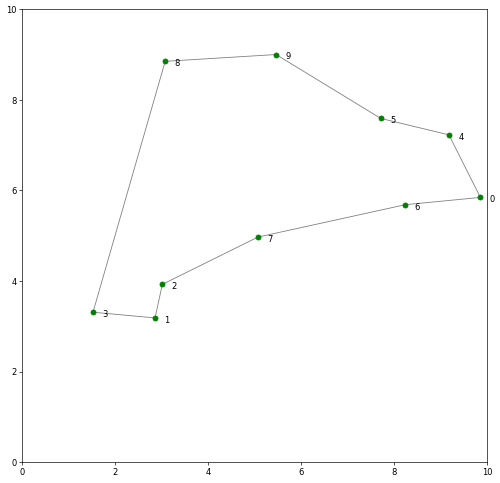

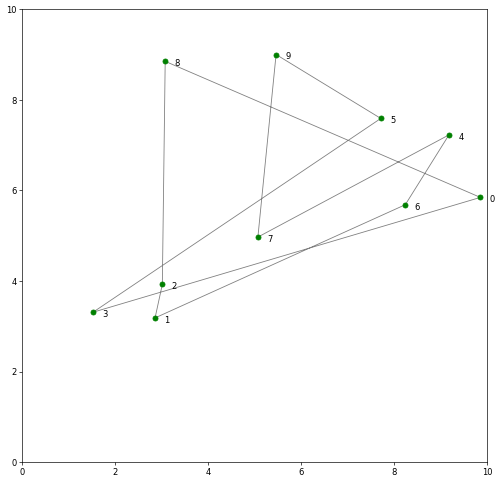

In [0]:
N = 10

currTour = random.sample(range(N), N)#random.sample(range(N), N) # start with a random tour
originalTour = np.copy(currTour) #just make a copy of the original tour for
    #later check
numSteps = 1000 # number of steps
sig2 = 1 # starting value for sigma^2
decFac = 0.9 # decrease factor

dist = distTour1(currTour) # this is the only time we need to call distTour()

for s in range(numSteps):
  # choose two indexes i < j, from the set {0, 1, ..., N-1}
  # make sure it is not the case that i = 0 and j = N-1 (if this occurs, you could just use `continue` to try again)

  i = random.randint(0,N-1)
  j = random.randint(0,N-1)
  jnext = j + 1
  ibefore = i - 1
  if i > j or (i==0 and j==N-1):
    continue 
  if i == 0:
    ibefore = N - 1
  elif j == N-1:
    jnext = 0

  # compute the distance lost and the distance gained
  distLost = distPair1(currTour,ibefore,i) + distPair1(currTour, j, jnext)
  distGain = distPair1(currTour,ibefore,j) + distPair1(currTour, i, jnext)
  deltaDist = distGain - distLost
  
  # compute rho
  # avoid overflow when deltaDist is negative and sig2 is very close to zero
  rho = 1
  if deltaDist > 0:
    rho = math.exp(-deltaDist/sig2)
    
  rand = random.random()    # random number between 0 and 1
  if rand < rho:
    # then accept the proposed transition
    # this involves updating currTour by reversing part of the tour

    
       
    partTour = currTour[i:j+1]
    partTour.reverse()
    currTour[i:j+1] = partTour
    
    
    # also make sure you update dist
    dist = distTour1(currTour)
    
  # otherwise, no transition
  
  # decrease sigma^2
  sig2 = sig2*decFac
  
  # If you want, print sig2 and dist every 100 steps. This is a useful check.
  if s % 100 == 0:
    print("sig2:", sig2, ", dist:", dist)
    
    
# display the results

print("original tour:", originalTour)
print("final tour:", currTour)
print("original dist is:", distTour1(originalTour))
print("Finished. Distance is:", dist)
plotTour(currTour)
plotTour(originalTour)

  

Compare the finished tour with the original tour, the finished tour has more moves that are horizontal instead vertical. 

#Additional implementation 2
for this part, I would like to investigate question 2:

Suppose that the points lie on either side of a border, and crossing the border involves an additional cost. For example, you might let the line y = 5 be the border. If an edge crosses this line, then its \cost" equals its distance plus some constant c. The cost of traveling along an edge that doesn't cross the border is simply the distance along the edge. The cost function is now the function to minimize along the tour.

First, we need to update the distPair function to include the penalty value for crossing the border. For the border, I would like to set y = 8

In [0]:
# compute the distance between the ith and jth points on a tour
# assume the coordinates of points are stored in a global variable called `points`
def distPair2(tour, i, j):
  x1 = points[tour[i],0] #index of ith point on the tour   #tour[j] index of jth point of the tour
  y1=points[tour[i],1]
  x2 = points[tour[j],0]
  y2 = points[tour[j],1]
  d = y2 - y1
  if y2 > 8:
    dis = math.sqrt((x2-x1)**2 + (d)**2)+100
  else:
    dis = math.sqrt((x2-x1)**2 + (d)**2)
  
  return dis

Again, update the function for calculating the tour distance: 

In [0]:
def distTour2(tour):
  dist = 0
  N = len(tour)
  
  for i in range(N-1): # i from 0 to N-2
    # first point is tour[0] to tour[1], last pair is from tour[N-2] to tour[N-1]
    dist += distPair2(tour, i, i+1)
    dist += distPair2(tour, N-1, 0)
  return dist

Run the entire annealing process again:

sig2: 0.0024650347049580707 , dist: 261.0331008024302
sig2: 1.2704234747596576e-05 , dist: 269.24024174338257
sig2: 5.8927293063124204e-08 , dist: 263.0829791819057
sig2: 1.307320402228525e-10 , dist: 263.0829791819057
sig2: 5.615986545028133e-18 , dist: 263.0829791819057
original tour: [4 3 6 7 5 0 9 8 2 1]
final tour: [2, 3, 1, 7, 6, 0, 4, 5, 9, 8]
original dist is: 306.446038166563
Finished. Distance is: 263.0829791819057


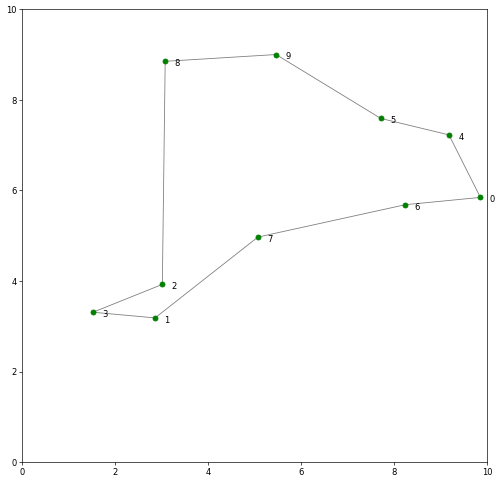

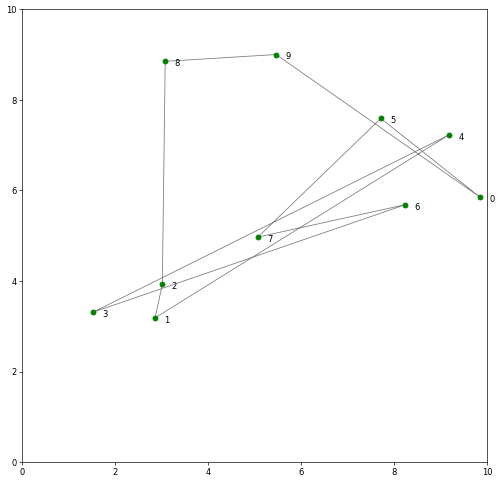

In [0]:
N = 10

currTour = random.sample(range(N), N)#random.sample(range(N), N) # start with a random tour
originalTour = np.copy(currTour) #just make a copy of the original tour for
    #later check
numSteps = 1000 # number of steps
sig2 = 1 # starting value for sigma^2
decFac = 0.9 # decrease factor

dist = distTour2(currTour) # this is the only time we need to call distTour()

for s in range(numSteps):
  # choose two indexes i < j, from the set {0, 1, ..., N-1}
  # make sure it is not the case that i = 0 and j = N-1 (if this occurs, you could just use `continue` to try again)
  i = random.randint(0,N-1)
  j = random.randint(0,N-1)
  jnext = j + 1
  ibefore = i - 1
  if i > j or (i==0 and j==N-1):
    continue 
  if i == 0:
    ibefore = N - 1
  elif j == N-1:
    jnext = 0
  

  # compute the distance lost and the distance gained
  distLost = distPair2(currTour,ibefore,i) + distPair2(currTour, j, jnext)
  distGain = distPair2(currTour,ibefore,j) + distPair2(currTour, i, jnext)
  deltaDist = distGain - distLost
  
  # compute rho
  # avoid overflow when deltaDist is negative and sig2 is very close to zero
  rho = 1
  if deltaDist > 0:
    rho = math.exp(-deltaDist/sig2)
    
  rand = random.random()    # random number between 0 and 1
  if rand < rho:
    # then accept the proposed transition
    # this involves updating currTour by reversing part of the tour

    
      
    partTour = currTour[i:j+1]
    partTour.reverse()
    currTour[i:j+1] = partTour
    
    
    # also make sure you update dist
    dist = distTour2(currTour)
    
  # otherwise, no transition
  
  # decrease sigma^2
  sig2 = sig2*decFac
  
  # If you want, print sig2 and dist every 100 steps. This is a useful check.
  if s % 100 == 0:
    print("sig2:", sig2, ", dist:", dist)
    
    
# display the results

print("original tour:", originalTour)
print("final tour:", currTour)
print("original dist is:", distTour2(originalTour))
print("Finished. Distance is:", dist)
plotTour(currTour)
plotTour(originalTour)


Comepare the finished tour with the original tour, the finished tour tempts the ge out of the region that is to the right side of y=8. When checking the final tour array, we could see the order and see the tour only enters y > 8 region once. 

#Limitation and Discussion:



For the limitation, for the code above and for each number of steps, the code chunk regenerate a path and update the path. In the other words, if the number of steps is really big, the code chunk above might become slow. But, at this point, I don't really know the solution to this limitation. 
For difficulty I have met during this project was that, I accidently overwrote list equls to some function, This replace the python build-in function list with the list function i defined. I did not figure out how to place it back. 